In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('crime_data.csv')
df.info()

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426839 entries, 0 to 426838
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      426839 non-null  object 
 1   OFFENSE_CODE         426839 non-null  int64  
 2   OFFENSE_CODE_GROUP   426839 non-null  object 
 3   OFFENSE_DESCRIPTION  426839 non-null  object 
 4   DISTRICT             424670 non-null  object 
 5   REPORTING_AREA       426839 non-null  object 
 6   SHOOTING             1746 non-null    object 
 7   OCCURRED_ON_DATE     426839 non-null  object 
 8   YEAR                 426839 non-null  int64  
 9   MONTH                426839 non-null  int64  
 10  DAY_OF_WEEK          426839 non-null  object 
 11  HOUR                 426839 non-null  int64  
 12  UCR_PART             426729 non-null  object 
 13  STREET               414448 non-null  object 
 14  Lat                  399635 non-null  float64
 15  Long             

[incident_num] [varchar](20) NOT NULL,	Internal BPD report number
[offense_code][varchar](25) NULL,	Numerical code of offense description
[Offense_Code_Group_Description][varchar](80) NULL,	Internal categorization of [offense_description]
[Offense_Description][varchar](80) NULL,	Primary descriptor of incident
[district] [varchar](10) NULL,	What district the crime was reported in
[reporting_area] [varchar](10) NULL,	RA number associated with the where the crime was reported from.
[shooting][char] (1) NULL,	Indicated a shooting took place.
[occurred_on] [datetime2](7) NULL,	Earliest date and time the incident could have taken place
[UCR_Part] [varchar](25) NULL,	Universal Crime Reporting Part number (1,2, 3)
[street] [varchar](50) NULL,	Street name the incident took place

In [3]:
df.tail(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
426829,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,6/5/2016 17:25,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
426830,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,7/9/2015 13:38,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
426831,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,7/9/2015 13:38,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
426832,I020695506-00,1806,Drug Violation,DRUGS - CLASS B TRAFFICKING OVER 18 GRAMS,A1,77,NaN,5/23/2019 8:00,2019,5,Thursday,8,Part Two,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426833,I020695210-00,1843,Drug Violation,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,A1,77,NaN,5/23/2019 9:00,2019,5,Thursday,9,Part Two,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426834,I020691165-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,5/23/2019 8:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426835,I020674147-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,5/23/2019 8:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426836,I020669075-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,5/23/2019 8:00,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426837,I020662996-00,3125,Warrant Arrests,WARRANT ARREST,A1,77,NaN,5/23/2019 8:56,2019,5,Thursday,8,Part Three,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
426838,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,5/31/2016 19:35,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [4]:
# check the number of rows with empty cells
"""
    from the above we see that location is not empty but
    some lat long are empty
"""
np.sum(df.isnull())

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2169
REPORTING_AREA              0
SHOOTING               425093
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  110
STREET                  12391
Lat                     27204
Long                    27204
Location                    0
dtype: int64

<AxesSubplot:xlabel='DISTRICT', ylabel='count'>

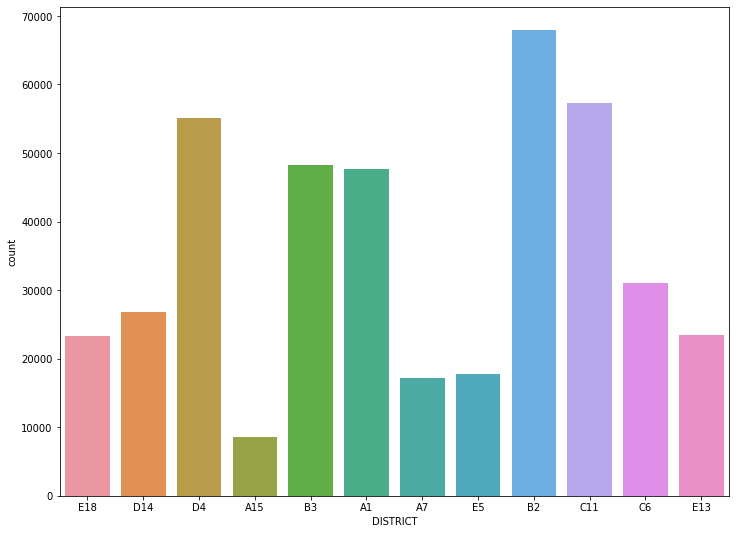

In [5]:
# these are the police districts and not the usual administrative 
plt.figure(figsize=(12,9))
sns.countplot(x="DISTRICT",data=df)

[Text(0, 0, 'SICK/INJURED/MEDICAL - PERSON'),
 Text(1, 0, 'INVESTIGATE PERSON'),
 Text(2, 0, 'M/V - LEAVING SCENE - PROPERTY DAMAGE'),
 Text(3, 0, 'ASSAULT SIMPLE - BATTERY'),
 Text(4, 0, 'VANDALISM'),
 Text(5, 0, 'VERBAL DISPUTE'),
 Text(6, 0, 'INVESTIGATE PROPERTY'),
 Text(7, 0, 'TOWED MOTOR VEHICLE'),
 Text(8, 0, 'PROPERTY - LOST'),
 Text(9, 0, 'THREATS TO DO BODILY HARM'),
 Text(10, 0, 'LARCENY THEFT FROM BUILDING'),
 Text(11, 0, 'LARCENY THEFT FROM MV - NON-ACCESSORY'),
 Text(12, 0, 'WARRANT ARREST'),
 Text(13, 0, 'LARCENY SHOPLIFTING'),
 Text(14, 0, 'M/V ACCIDENT - PROPERTY \xa0DAMAGE')]

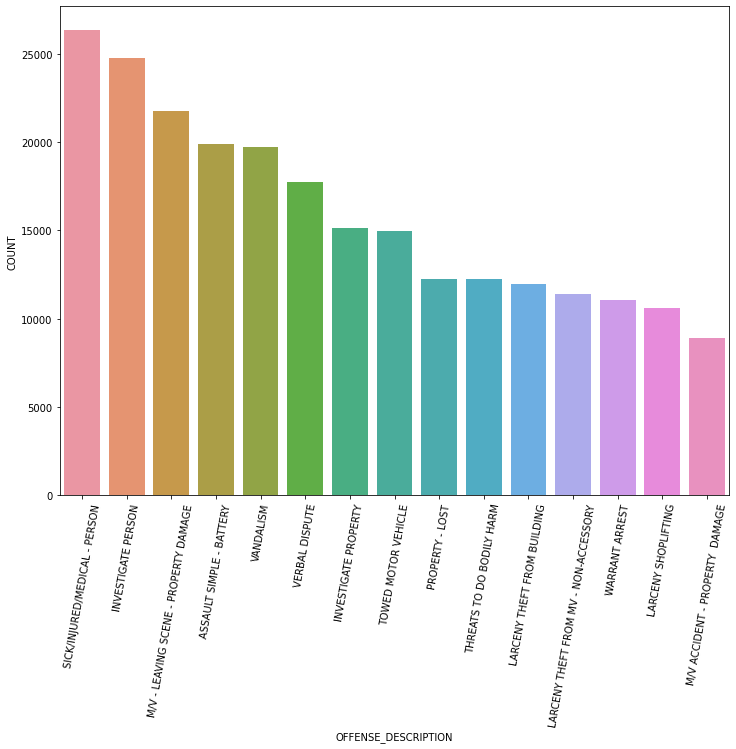

In [6]:
"""
    1.What crime is more popular in Boston? 
    ie. What offense is more popular
    get the count
""" 
crime_popularity =df.groupby(['OFFENSE_DESCRIPTION']).size().nlargest(15).sort_values(ascending=False).reset_index()
crime_popularity.columns = ['OFFENSE_DESCRIPTION', 'COUNT']
plt.figure(figsize=(12, 9))
top15CrimesChart = sns.barplot(x='OFFENSE_DESCRIPTION', y='COUNT', data=crime_popularity)
top15CrimesChart.set_xticklabels(top15CrimesChart.get_xticklabels(), rotation=80)

<AxesSubplot:xlabel='HOUR', ylabel='count'>

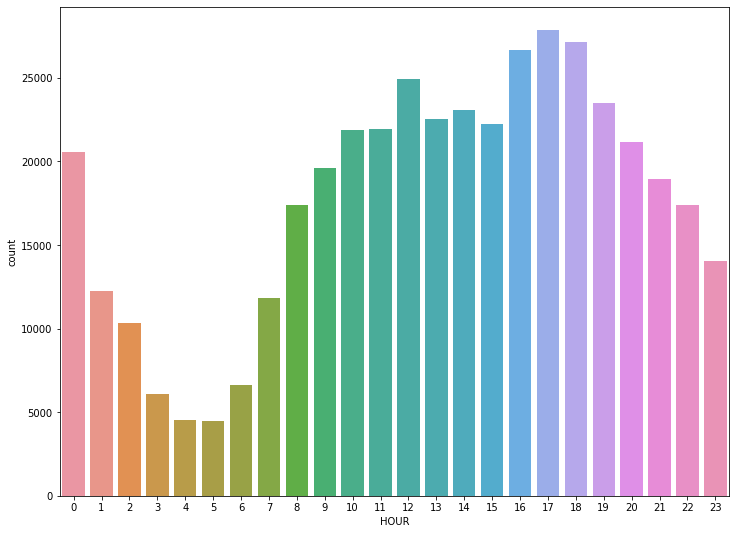

In [7]:
"""
        What hour of the day, day of the week, month,year is more prone to crime? 
         1.Day
"""
plt.figure(figsize=(12, 9))
sns.countplot(x='HOUR', data=df)

<AxesSubplot:xlabel='DAY_OF_WEEK', ylabel='count'>

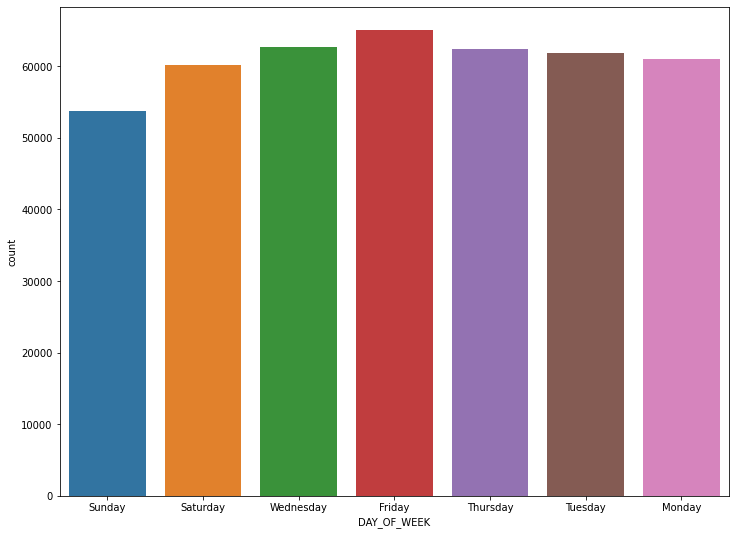

In [8]:
"""
        2. HOUR
"""
plt.figure(figsize=(12, 9))
sns.countplot(data=df, x ='DAY_OF_WEEK')

<AxesSubplot:xlabel='MONTH', ylabel='count'>

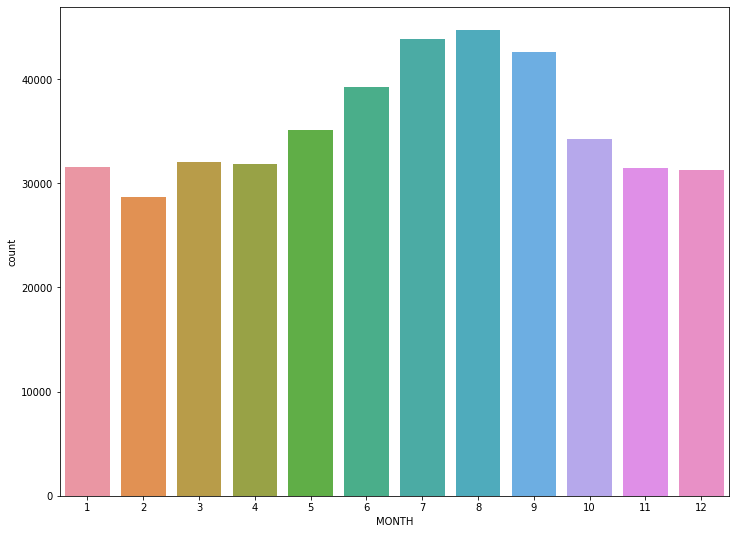

In [9]:
"""
        3. MONTH
"""
plt.figure(figsize=(12, 9))
sns.countplot(x='MONTH', data=df)

<AxesSubplot:xlabel='YEAR', ylabel='count'>

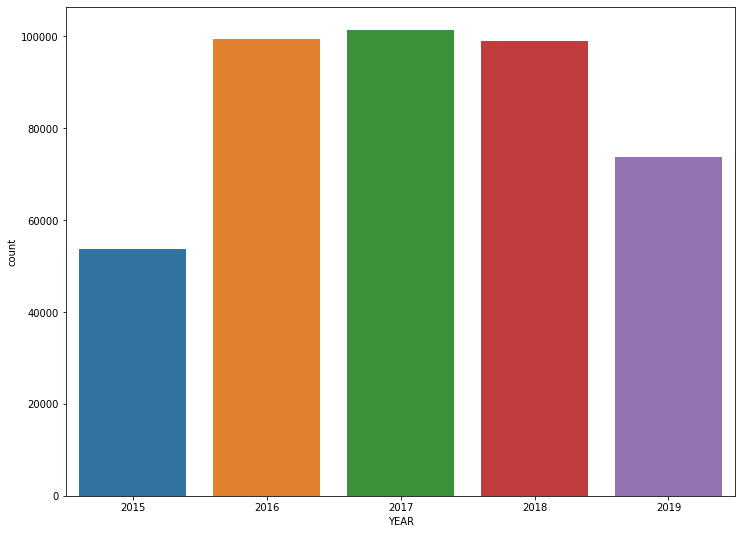

In [10]:
"""
    4. YEAR
"""
plt.figure(figsize=(12, 9))
sns.countplot(x='YEAR', data=df)

In [11]:
#  get the date of a crime
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'], infer_datetime_format=True)

In [12]:
# Create a new date column
# format is YYYY-MM-DD
df['CRIME_DAY'] = df['OCCURRED_ON_DATE'].apply(lambda x :x.date())

In [13]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CRIME_DAY
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:00,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:00,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:00,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:00,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:00,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02


In [14]:
"""
    group by day and hour to create multi level index, 
    count the number of entries then access the offence_code columnn
    we then use the unstack method to reshape to a new dataframe
"""
dayHour = df.groupby(by=['DAY_OF_WEEK', 'HOUR']).count()['OFFENSE_CODE'].unstack()
dayHour

HOUR,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
Friday,2884,1692,1330,709,580,657,1015,1877,2743,3097,...,3508,3421,4099,4412,4038,3453,3090,2816,2905,2530
Monday,2792,1385,1129,727,516,563,994,1821,2692,2852,...,3305,3238,4050,4286,4149,3521,3059,2656,2254,1674
Saturday,3497,2427,2429,1308,884,663,706,1421,2058,2372,...,3177,2813,3336,3424,3422,3046,2897,2815,2754,2598
Sunday,3247,2701,2476,1473,937,673,691,1009,1526,1907,...,2700,2558,3029,3284,3109,2830,2809,2566,2324,1813
Thursday,2803,1380,1045,709,581,662,1088,1894,2702,3104,...,3422,3471,3928,3993,4033,3345,3099,2748,2471,2008
Tuesday,2602,1348,877,620,516,648,1067,1869,2826,3121,...,3384,3393,4131,4302,4228,3588,3142,2596,2342,1746
Wednesday,2697,1289,1059,565,516,626,1077,1958,2832,3165,...,3536,3347,4098,4151,4141,3677,3060,2763,2337,1691


<AxesSubplot:xlabel='HOUR', ylabel='DAY_OF_WEEK'>

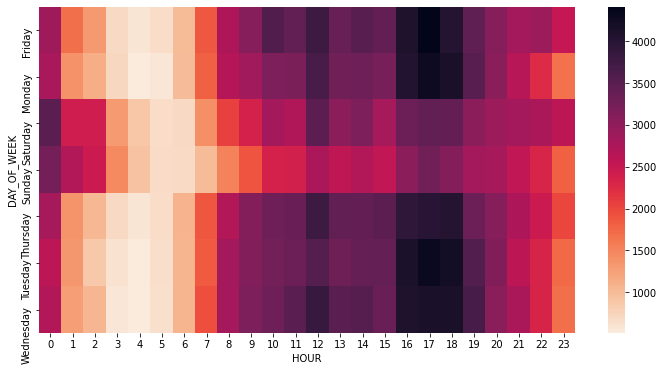

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='rocket_r')

In [16]:
dayMonth = df.groupby(['DAY_OF_WEEK', 'MONTH']).count()['OFFENSE_CODE'].unstack()
dayMonth

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
DAY_OF_WEEK,,,,,,,,,,,,
Friday,4789,4423,5240,4787,5116,6113,6469,6619,6932,5011,4709,4842
Monday,4482,4341,4180,4818,4947,5545,6705,6572,5650,5143,4393,4224
Saturday,4268,4097,4516,4833,4376,5697,6150,6161,6162,5014,4259,4596
Sunday,3963,3436,3893,4305,4180,4691,5841,5329,5532,4458,4002,4143
Thursday,4430,4129,5114,4356,5327,6035,5916,6807,6173,4732,4593,4744
Tuesday,4968,4115,4389,4369,5534,5504,6324,6526,6000,5049,4679,4360
Wednesday,4649,4154,4761,4399,5618,5708,6447,6718,6137,4884,4825,4414


<AxesSubplot:xlabel='MONTH', ylabel='DAY_OF_WEEK'>

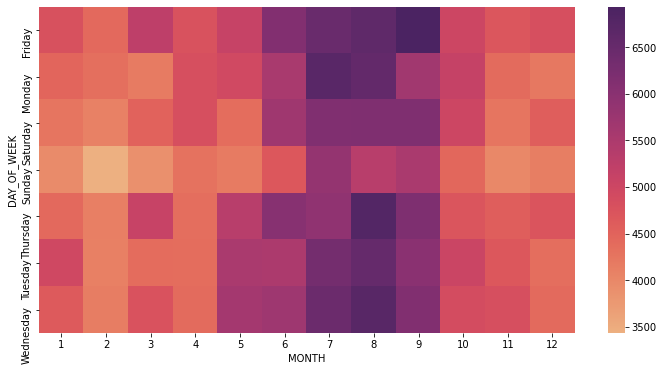

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='flare')

<AxesSubplot:xlabel='Lat', ylabel='Long'>

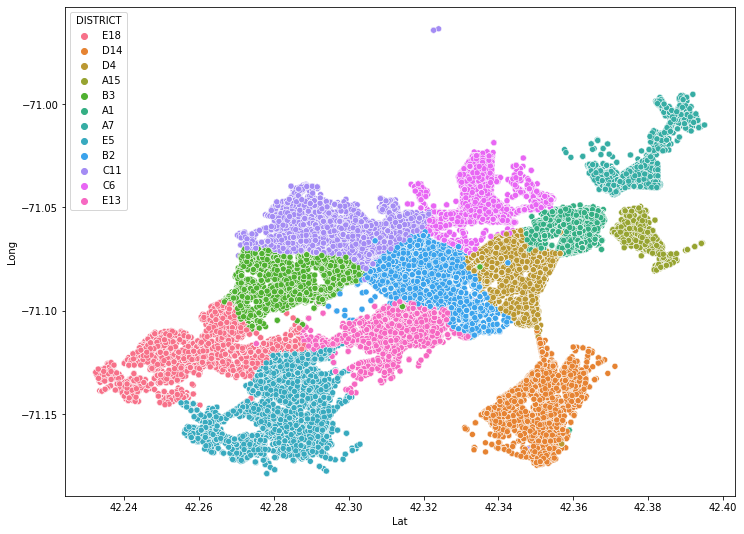

In [18]:
plt.figure(figsize=(12,9))
sp = df[(df['Lat'] != -1) & (df['Long'] != -1)]
sns.scatterplot(x="Lat", y="Long", hue="DISTRICT", data=sp)

In [19]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CRIME_DAY
0,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:00,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)",2019-10-13
1,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:00,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)",2019-10-12
2,I192082680,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,D14,794,NaN,2019-10-12 15:12:00,2019,10,Saturday,15,Part One,ALLSTON ST,42.352375,-71.135096,"(42.35237455, -71.13509584)",2019-10-12
3,I192082577,724,Auto Theft,AUTO THEFT,D4,130,NaN,2019-10-12 04:41:00,2019,10,Saturday,4,Part One,SAINT JAMES AVE,42.349476,-71.076402,"(42.34947586, -71.07640150)",2019-10-12
4,I192079582,727,Auto Theft,AUTO THEFT - LEASED/RENTED VEHICLE,A15,47,NaN,2019-10-02 08:08:00,2019,10,Wednesday,8,Part One,N MEAD ST,42.381846,-71.066551,"(42.38184582, -71.06655134)",2019-10-02


    According to https://www.legalmatch.com/law-library/article/what-are-the-different-types-of-crimes.html
    types of crimes are :
        Personal Crimes - Assault and Battery, False Imprisonment, kidnapping,
                        Homicide, Rape
        Property crimes - Theft, Arson, White Collar crimes, false pretense
                            Receipt of stolen goods
        Inchoate/Incomplete - any crime attempted, solicitation, conspiracy
        
        Others - those not in the other categories
        
        According to FBI UCR PART for universal crime reports are
        Part I 
        OffensesPart I offense classifications include (in this particular order):
            1. Criminal Homicide 
            2. Forcible Rape 
            3. Robbery
            4. Aggravated Assault
            5. Burglary 
            6. Larceny-theft (except motor vehicle theft)
            7. Motor Vehicle Theft
            8. Arson
        Part II 
        OffensesPart II offenses encompass all other reportable classifications outside those defined as Part I.  Law enforcement agencies report to the FBI only arrest data involving the Part II crimes: 
            9. Other Assaults
            10. Forgery and Counterfeiting
            11. Fraud12. Embezzlement
            13. Stolen Property:  Buying, Receiving, Possessing
            14. Vandalism
            15. Weapons:  Carrying, Possessing, etc.
            16. Prostitution and Commercialized Vice
            17. Sex Offenses18. Drug Abuse Violations
            19. Gambling20. Offenses Against the Family and Children
            21. Driving Under the Influence22. Liquor Laws
            23. Drunkenness24. Disorderly Conduct
            25. Vagrancy26. All Other Offenses
            27. Suspicion28. Curfew and Loitering Laws—(Persons under 18)
            29. Runaways—(Persons under 18)

In [74]:
# get the crimes between 2016-2018
crimesIn16To18 = df[df['YEAR'].isin([2016, 2017, 2018])]
crimesIn16To18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299656 entries, 950 to 426838
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      299656 non-null  object        
 1   OFFENSE_CODE         299656 non-null  int64         
 2   OFFENSE_CODE_GROUP   299656 non-null  object        
 3   OFFENSE_DESCRIPTION  299656 non-null  object        
 4   DISTRICT             297958 non-null  object        
 5   REPORTING_AREA       299656 non-null  object        
 6   SHOOTING             1204 non-null    object        
 7   OCCURRED_ON_DATE     299656 non-null  datetime64[ns]
 8   YEAR                 299656 non-null  int64         
 9   MONTH                299656 non-null  int64         
 10  DAY_OF_WEEK          299656 non-null  object        
 11  HOUR                 299656 non-null  int64         
 12  UCR_PART             299561 non-null  object        
 13  STREET      

In [75]:
crimesIn16To18['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [76]:
# only incidents with a shooting had an entry of Y in the SHOOTING column
# others were left empty, thus lets assign a binary 
crimesIn16To18['SHOOTING'] = np.where(crimesIn16To18['SHOOTING']=='Y', 1,0)

<ipython-input-76-ffe3ff9ede23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['SHOOTING'] = np.where(crimesIn16To18['SHOOTING']=='Y', 1,0)


In [77]:
crimesIn16To18['SHOOTING'].unique()

array([0, 1])

/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SHOOTING', ylabel='count'>

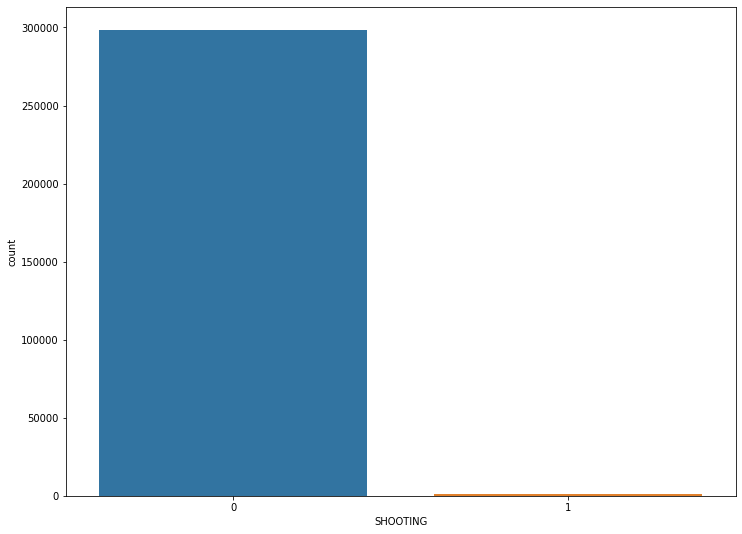

In [78]:
plt.figure(figsize=(12,9))
sns.countplot('SHOOTING', data=crimesIn16To18)

In [79]:
np.sum(crimesIn16To18.isna())

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1698
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  95
STREET                  9933
Lat                    20402
Long                   20402
Location                   0
CRIME_DAY                  0
dtype: int64

In [80]:
"""
    We can see that district , ucr_part , street, lat, long, location
    have nulls lets append a default value or drop the nan
"""

'\n    We can see that district , ucr_part , street, lat, long, location\n    have nulls lets append a default value or drop the nan\n'

In [81]:
crimesIn16To18['DISTRICT'].fillna('none', inplace=True)
crimesIn16To18['UCR_PART'].fillna('none', inplace=True)
crimesIn16To18['STREET'].fillna('none', inplace=True)

/usr/lib/python3.9/site-packages/pandas/core/series.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [82]:
np.sum(crimesIn16To18.isna())

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                   0
REPORTING_AREA             0
SHOOTING                   0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                   0
STREET                     0
Lat                    20402
Long                   20402
Location                   0
CRIME_DAY                  0
dtype: int64

In [83]:
latMean = crimesIn16To18['Lat'].sum() / len(crimesIn16To18['INCIDENT_NUMBER'])
longMean = crimesIn16To18['Long'].sum() / len(crimesIn16To18['INCIDENT_NUMBER'])
# we would have assign the nulls with the average lat long but the point falls
# in the middle of the ocean
latMean

39.325667645462836

In [84]:
crimesIn16To18.dropna(axis=0, how='any', inplace=True)

<ipython-input-84-84c9b2f2341b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18.dropna(axis=0, how='any', inplace=True)


In [85]:
np.sum(crimesIn16To18.isna())

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
CRIME_DAY              0
dtype: int64

In [86]:
crimesIn16To18['nightTime'] = 0

<ipython-input-86-6c98b0a89ffa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['nightTime'] = 0


In [87]:
crimesIn16To18['nightTime'].loc[(crimesIn16To18['HOUR'] >= 18)] = 1
crimesIn16To18['nightTime'].loc[(crimesIn16To18['HOUR'] <=5)] = 1

/usr/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-87-8742ca5d41b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['nightTime'].loc[(crimesIn16To18['HOUR'] >= 18)] = 1
/usr/lib/python3.9/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(inde

In [88]:
crimesIn16To18.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CRIME_DAY,nightTime
950,I192077559,3115,Investigate Person,INVESTIGATE PERSON,B3,468,0,2018-04-30 09:00:00,2018,4,Monday,9,Part Three,HAZLETON ST,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0
1140,I192077332,619,Larceny,LARCENY ALL OTHERS,E18,496,0,2018-03-06 08:00:00,2018,3,Tuesday,8,Part One,HYDE PARK AVE,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0
1768,I192076660,2629,Harassment,HARASSMENT,E5,662,0,2018-10-31 12:00:00,2018,10,Wednesday,12,Part Two,PRIMROSE ST,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0
2949,I192075386,2629,Harassment,HARASSMENT,A1,96,0,2018-04-09 08:43:00,2018,4,Monday,8,Part Two,ATLANTIC AVE,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0
3000,I192075335,3208,Property Lost,PROPERTY - MISSING,D4,132,0,2018-01-01 00:00:00,2018,1,Monday,0,Part Three,COMMONWEALTH AVE,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1


/usr/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nightTime', ylabel='count'>

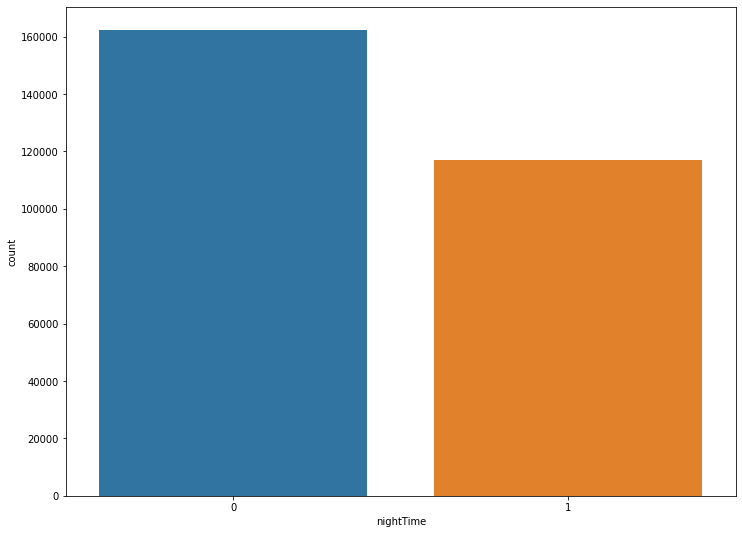

In [89]:
plt.figure(figsize=(12,9))
sns.countplot('nightTime', data=crimesIn16To18)

In [90]:
# add weather data 
from wwo_hist import retrieve_hist_data

In [91]:
frequency=24
start_date = '1-JAN-2015'
end_date = '31-DEC-2018'
api_key = 'f0c96d93eb2548f1bb2122600201512'
location_list = ['boston,ma']

# set the span, add my api key, retrieve the data and export it as a csv
"""
hist_weather_data = retrieve_hist_data(api_key,
                                location_list,
                                start_date,
                                end_date,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df = True)
"""


'\nhist_weather_data = retrieve_hist_data(api_key,\n                                location_list,\n                                start_date,\n                                end_date,\n                                frequency,\n                                location_label = False,\n                                export_csv = True,\n                                store_df = True)\n'

In [92]:
bostonWeather = pd.read_csv("boston,ma.csv")

In [93]:
bostonWeather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2015-01-01,-1,-5,0.0,8.7,2,72,01:55 PM,03:36 AM,07:14 AM,...,30,27,39,0.0,1016,-1,10,235,20,"boston,ma"
1,2015-01-02,4,-2,0.0,6.9,1,80,02:40 PM,04:36 AM,07:14 AM,...,30,25,58,0.0,1020,4,10,265,19,"boston,ma"
2,2015-01-03,-1,-4,0.0,5.2,1,87,03:31 PM,05:32 AM,07:14 AM,...,16,67,62,1.4,1035,-1,10,148,11,"boston,ma"
3,2015-01-04,7,2,0.0,3.4,1,94,04:23 PM,06:21 AM,07:14 AM,...,25,95,97,7.8,1011,7,6,156,13,"boston,ma"
4,2015-01-05,2,-9,0.0,5.2,1,100,05:19 PM,07:06 AM,07:14 AM,...,45,25,64,0.1,1015,2,9,286,30,"boston,ma"


In [94]:
bostonWeather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          1461 non-null   object 
 1   maxtempC           1461 non-null   int64  
 2   mintempC           1461 non-null   int64  
 3   totalSnow_cm       1461 non-null   float64
 4   sunHour            1461 non-null   float64
 5   uvIndex            1461 non-null   int64  
 6   moon_illumination  1461 non-null   int64  
 7   moonrise           1461 non-null   object 
 8   moonset            1461 non-null   object 
 9   sunrise            1461 non-null   object 
 10  sunset             1461 non-null   object 
 11  DewPointC          1461 non-null   int64  
 12  FeelsLikeC         1461 non-null   int64  
 13  HeatIndexC         1461 non-null   int64  
 14  WindChillC         1461 non-null   int64  
 15  WindGustKmph       1461 non-null   int64  
 16  cloudcover         1461 

In [95]:
# set the date_time column as a date time object
bostonWeather['date_time'] = pd.to_datetime(bostonWeather['date_time'], infer_datetime_format=True)
bostonWeather['date_time'] = bostonWeather['date_time'].apply(lambda x :x.date())

In [96]:
# some columns are not important 
crimesIn16To18.drop(axis=1, 
                    columns=['INCIDENT_NUMBER','OFFENSE_CODE', 'OCCURRED_ON_DATE','REPORTING_AREA','STREET'],
                   inplace=True)

/usr/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [97]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,CRIME_DAY,nightTime
950,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0
1140,Larceny,LARCENY ALL OTHERS,E18,0,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0
1768,Harassment,HARASSMENT,E5,0,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0
2949,Harassment,HARASSMENT,A1,0,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0
3000,Property Lost,PROPERTY - MISSING,D4,0,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1


In [98]:
crimesIn16To18['crimeType'] = ''

<ipython-input-98-95053ed36626>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['crimeType'] = ''


In [99]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,CRIME_DAY,nightTime,crimeType
950,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,
1140,Larceny,LARCENY ALL OTHERS,E18,0,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0,
1768,Harassment,HARASSMENT,E5,0,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0,
2949,Harassment,HARASSMENT,A1,0,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0,
3000,Property Lost,PROPERTY - MISSING,D4,0,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1,


In [100]:
# categorize the offense_code_group as either personal, property or pther
personalCrimes  = ['Aggravated Assault','Arson', 'Biological Threat',
                  'Criminal Harassment', 'Explosives','Homicide',
                  'HUMAN TRAFFICKING', 'Manslaughter']
propertyCrimes = ['Auto Theft', 'Burglary - No Property Taken', 
                  'Commercial Burglary', 'HOME INVASION',
                  'Larceny From Motor Vehicle',  'Other Burglary', 
                 'Property Related Damage','Residential Burglary','Robbery']

In [101]:
def returnCrime(crime):
    if (crime in personalCrimes):
        return 'personal'
    elif (crime in propertyCrimes):
        return 'property'
    else:
        return 'other'
crimesIn16To18['crimeType'] = crimesIn16To18['OFFENSE_CODE_GROUP'].apply(returnCrime)


<ipython-input-101-bb7b82e08417>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['crimeType'] = crimesIn16To18['OFFENSE_CODE_GROUP'].apply(returnCrime)


In [102]:
crimesIn16To18[crimesIn16To18['crimeType'] == 'property']

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,CRIME_DAY,nightTime,crimeType
3899,Auto Theft,AUTO THEFT,E13,0,2018,11,Monday,15,Part One,42.314334,-71.097914,"(42.31433402, -71.09791405)",2018-11-05,0,property
5587,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,C11,0,2017,11,Thursday,0,Part One,42.304186,-71.065549,"(42.30418639, -71.06554861)",2017-11-09,1,property
6351,Commercial Burglary,BURGLARY - COMMERICAL - NO FORCE,D4,0,2018,9,Tuesday,22,Part One,42.348248,-71.073604,"(42.34824818, -71.07360419)",2018-09-18,1,property
17529,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,0,2018,8,Sunday,1,Part One,42.351477,-71.151435,"(42.35147715, -71.15143461)",2018-08-05,1,property
30422,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,E18,0,2018,11,Tuesday,10,Part One,42.269557,-71.121790,"(42.26955726, -71.12179039)",2018-11-20,0,property
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426696,Burglary - No Property Taken,B&E RESIDENCE DAY - NO PROP TAKEN,E18,0,2016,1,Tuesday,14,Other,42.277272,-71.115730,"(42.27727177, -71.11572996)",2016-01-12,0,property
426697,Burglary - No Property Taken,B&E RESIDENCE DAY - NO PROP TAKEN,E18,0,2016,1,Tuesday,14,Other,42.277272,-71.115730,"(42.27727177, -71.11572996)",2016-01-12,0,property
426755,Auto Theft,AUTO THEFT,C6,0,2016,9,Friday,19,Part One,42.346953,-71.051127,"(42.34695268, -71.05112684)",2016-09-23,1,property
426756,Auto Theft,AUTO THEFT,C6,0,2016,9,Friday,19,Part One,42.346953,-71.051127,"(42.34695268, -71.05112684)",2016-09-23,1,property


In [103]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Location,CRIME_DAY,nightTime,crimeType
950,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,Monday,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other
1140,Larceny,LARCENY ALL OTHERS,E18,0,2018,3,Tuesday,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0,other
1768,Harassment,HARASSMENT,E5,0,2018,10,Wednesday,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0,other
2949,Harassment,HARASSMENT,A1,0,2018,4,Monday,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0,other
3000,Property Lost,PROPERTY - MISSING,D4,0,2018,1,Monday,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1,other


### One hot encoding

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
enc = LabelEncoder()
enc.fit(crimesIn16To18['DAY_OF_WEEK'])
crimesIn16To18['Day_of_Week'] = enc.transform(crimesIn16To18['DAY_OF_WEEK'])
crimesIn16To18.drop(['DAY_OF_WEEK'], axis=1, inplace=True)

<ipython-input-105-5794be3875c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['Day_of_Week'] = enc.transform(crimesIn16To18['DAY_OF_WEEK'])
/usr/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [106]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,UCR_PART,Lat,Long,Location,CRIME_DAY,nightTime,crimeType,Day_of_Week
950,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,Part Three,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other,1
1140,Larceny,LARCENY ALL OTHERS,E18,0,2018,3,8,Part One,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0,other,5
1768,Harassment,HARASSMENT,E5,0,2018,10,12,Part Two,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0,other,6
2949,Harassment,HARASSMENT,A1,0,2018,4,8,Part Two,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0,other,1
3000,Property Lost,PROPERTY - MISSING,D4,0,2018,1,0,Part Three,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1,other,1


In [107]:
enc = LabelEncoder()
enc.fit(crimesIn16To18['UCR_PART'])
crimesIn16To18['Ucr_Part'] = enc.transform(crimesIn16To18['UCR_PART'])
crimesIn16To18.drop(['UCR_PART'], axis=1, inplace=True)

<ipython-input-107-1206ee95648c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimesIn16To18['Ucr_Part'] = enc.transform(crimesIn16To18['UCR_PART'])
/usr/lib/python3.9/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [108]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,CRIME_DAY,nightTime,crimeType,Day_of_Week,Ucr_Part
950,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other,1,2
1140,Larceny,LARCENY ALL OTHERS,E18,0,2018,3,8,42.269224,-71.120853,"(42.26922388, -71.12085347)",2018-03-06,0,other,5,1
1768,Harassment,HARASSMENT,E5,0,2018,10,12,42.290765,-71.130211,"(42.29076521, -71.13021098)",2018-10-31,0,other,6,3
2949,Harassment,HARASSMENT,A1,0,2018,4,8,42.355264,-71.050988,"(42.35526402, -71.05098788)",2018-04-09,0,other,1,3
3000,Property Lost,PROPERTY - MISSING,D4,0,2018,1,0,42.353522,-71.072838,"(42.35352153, -71.07283786)",2018-01-01,1,other,1,2


In [109]:
# add weather data 
crimesIn16To18 = pd.merge(crimesIn16To18, bostonWeather[['date_time','mintempC', 'totalSnow_cm', 'precipMM', 'windspeedKmph']], left_on='CRIME_DAY', right_on='date_time')

In [110]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,CRIME_DAY,nightTime,crimeType,Day_of_Week,Ucr_Part,date_time,mintempC,totalSnow_cm,precipMM,windspeedKmph
0,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other,1,2,2018-04-30,4,0.0,3.2,7
1,Property Lost,PROPERTY - LOST,A1,0,2018,4,13,42.366008,-71.064035,"(42.36600842, -71.06403504)",2018-04-30,0,other,1,2,2018-04-30,4,0.0,3.2,7
2,Property Lost,PROPERTY - LOST,C11,0,2018,4,0,42.313712,-71.057041,"(42.31371151, -71.05704145)",2018-04-30,1,other,1,2,2018-04-30,4,0.0,3.2,7
3,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,0,2018,4,0,42.350460,-71.152658,"(42.35046039, -71.15265804)",2018-04-30,1,other,1,3,2018-04-30,4,0.0,3.2,7
4,Larceny,LARCENY THEFT FROM BUILDING,D4,0,2018,4,11,42.346271,-71.088726,"(42.34627140, -71.08872599)",2018-04-30,0,other,1,1,2018-04-30,4,0.0,3.2,7


In [111]:
# add unemploment data
unemploymentRate = pd.read_csv('unemployment.csv')
unemploymentRate.head()

,Unnamed: 0,MAURN,year,month
0,0,6.9,2012,7
1,1,6.6,2012,8
2,2,6.6,2012,9
3,3,6.2,2012,10
4,4,6.3,2012,11


In [112]:
unemploymentRate.rename(columns={'year':'YEAR', 'month':'MONTH'}, inplace=True)

In [113]:
crimesIn16To18 = pd.merge(crimesIn16To18, unemploymentRate, how = 'left', on = ['YEAR','MONTH'], validate = 'many_to_one')

In [114]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,...,crimeType,Day_of_Week,Ucr_Part,date_time,mintempC,totalSnow_cm,precipMM,windspeedKmph,Unnamed: 0,MAURN
0,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",...,other,1,2,2018-04-30,4,0.0,3.2,7,69,3.2
1,Property Lost,PROPERTY - LOST,A1,0,2018,4,13,42.366008,-71.064035,"(42.36600842, -71.06403504)",...,other,1,2,2018-04-30,4,0.0,3.2,7,69,3.2
2,Property Lost,PROPERTY - LOST,C11,0,2018,4,0,42.313712,-71.057041,"(42.31371151, -71.05704145)",...,other,1,2,2018-04-30,4,0.0,3.2,7,69,3.2
3,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,0,2018,4,0,42.350460,-71.152658,"(42.35046039, -71.15265804)",...,other,1,3,2018-04-30,4,0.0,3.2,7,69,3.2
4,Larceny,LARCENY THEFT FROM BUILDING,D4,0,2018,4,11,42.346271,-71.088726,"(42.34627140, -71.08872599)",...,other,1,1,2018-04-30,4,0.0,3.2,7,69,3.2


In [115]:
crimesIn16To18.columns

Index(['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'SHOOTING',
       'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long', 'Location', 'CRIME_DAY',
       'nightTime', 'crimeType', 'Day_of_Week', 'Ucr_Part', 'date_time',
       'mintempC', 'totalSnow_cm', 'precipMM', 'windspeedKmph', 'Unnamed: 0',
       'MAURN'],
      dtype='object')

In [116]:
crimesIn16To18.drop(columns=['Unnamed: 0', 'date_time'],axis=1 ,inplace=True)

In [117]:
crimesIn16To18.rename(columns={'MAURN':'unemploymentRate'}, inplace=True)

In [118]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,CRIME_DAY,nightTime,crimeType,Day_of_Week,Ucr_Part,mintempC,totalSnow_cm,precipMM,windspeedKmph,unemploymentRate
0,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other,1,2,4,0.0,3.2,7,3.2
1,Property Lost,PROPERTY - LOST,A1,0,2018,4,13,42.366008,-71.064035,"(42.36600842, -71.06403504)",2018-04-30,0,other,1,2,4,0.0,3.2,7,3.2
2,Property Lost,PROPERTY - LOST,C11,0,2018,4,0,42.313712,-71.057041,"(42.31371151, -71.05704145)",2018-04-30,1,other,1,2,4,0.0,3.2,7,3.2
3,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,0,2018,4,0,42.350460,-71.152658,"(42.35046039, -71.15265804)",2018-04-30,1,other,1,3,4,0.0,3.2,7,3.2
4,Larceny,LARCENY THEFT FROM BUILDING,D4,0,2018,4,11,42.346271,-71.088726,"(42.34627140, -71.08872599)",2018-04-30,0,other,1,1,4,0.0,3.2,7,3.2


In [119]:
crimesIn16To18.columns

Index(['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'DISTRICT', 'SHOOTING',
       'YEAR', 'MONTH', 'HOUR', 'Lat', 'Long', 'Location', 'CRIME_DAY',
       'nightTime', 'crimeType', 'Day_of_Week', 'Ucr_Part', 'mintempC',
       'totalSnow_cm', 'precipMM', 'windspeedKmph', 'unemploymentRate'],
      dtype='object')

<AxesSubplot:>

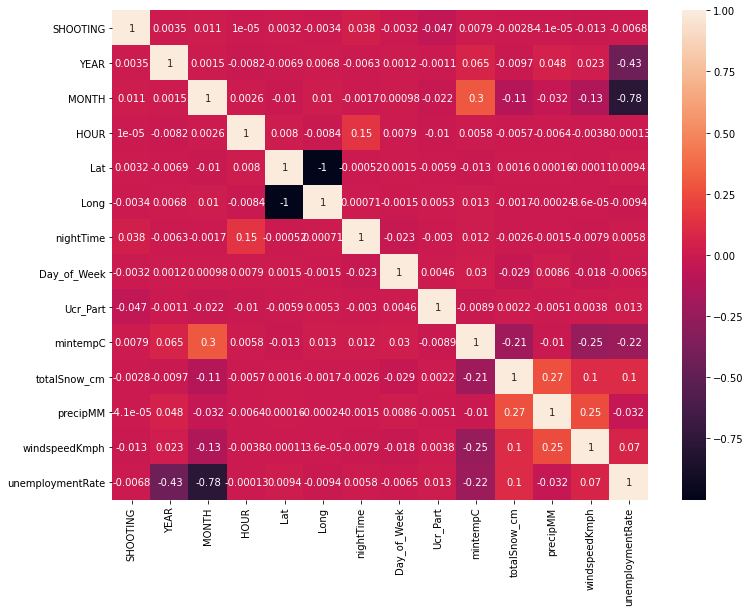

In [120]:
plt.figure(figsize=(12,9))
sns.heatmap(crimesIn16To18.corr(), annot=True)

In [121]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,CRIME_DAY,nightTime,crimeType,Day_of_Week,Ucr_Part,mintempC,totalSnow_cm,precipMM,windspeedKmph,unemploymentRate
0,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",2018-04-30,0,other,1,2,4,0.0,3.2,7,3.2
1,Property Lost,PROPERTY - LOST,A1,0,2018,4,13,42.366008,-71.064035,"(42.36600842, -71.06403504)",2018-04-30,0,other,1,2,4,0.0,3.2,7,3.2
2,Property Lost,PROPERTY - LOST,C11,0,2018,4,0,42.313712,-71.057041,"(42.31371151, -71.05704145)",2018-04-30,1,other,1,2,4,0.0,3.2,7,3.2
3,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,0,2018,4,0,42.350460,-71.152658,"(42.35046039, -71.15265804)",2018-04-30,1,other,1,3,4,0.0,3.2,7,3.2
4,Larceny,LARCENY THEFT FROM BUILDING,D4,0,2018,4,11,42.346271,-71.088726,"(42.34627140, -71.08872599)",2018-04-30,0,other,1,1,4,0.0,3.2,7,3.2


In [122]:
crimesIn16To18 = pd.concat([crimesIn16To18, pd.get_dummies(crimesIn16To18['DISTRICT'], prefix='D')], axis=1)

In [123]:
crimesIn16To18.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,SHOOTING,YEAR,MONTH,HOUR,Lat,Long,Location,...,D_B2,D_B3,D_C11,D_C6,D_D14,D_D4,D_E13,D_E18,D_E5,D_none
0,Investigate Person,INVESTIGATE PERSON,B3,0,2018,4,9,42.279971,-71.095534,"(42.27997063, -71.09553354)",...,0,1,0,0,0,0,0,0,0,0
1,Property Lost,PROPERTY - LOST,A1,0,2018,4,13,42.366008,-71.064035,"(42.36600842, -71.06403504)",...,0,0,0,0,0,0,0,0,0,0
2,Property Lost,PROPERTY - LOST,C11,0,2018,4,0,42.313712,-71.057041,"(42.31371151, -71.05704145)",...,0,0,1,0,0,0,0,0,0,0
3,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D14,0,2018,4,0,42.350460,-71.152658,"(42.35046039, -71.15265804)",...,0,0,0,0,1,0,0,0,0,0
4,Larceny,LARCENY THEFT FROM BUILDING,D4,0,2018,4,11,42.346271,-71.088726,"(42.34627140, -71.08872599)",...,0,0,0,0,0,1,0,0,0,0


In [124]:
crimesIn16To18.drop(columns='DISTRICT', axis=1, inplace=True)

In [126]:
crimesIn16To18['CRIME_DAY']=crimesIn16To18['CRIME_DAY'].apply(lambda x :x.toordinal())

In [127]:
crimesIn16To18.columns

Index(['OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', 'SHOOTING', 'YEAR',
       'MONTH', 'HOUR', 'Lat', 'Long', 'Location', 'CRIME_DAY', 'nightTime',
       'crimeType', 'Day_of_Week', 'Ucr_Part', 'mintempC', 'totalSnow_cm',
       'precipMM', 'windspeedKmph', 'unemploymentRate', 'D_A1', 'D_A15',
       'D_A7', 'D_B2', 'D_B3', 'D_C11', 'D_C6', 'D_D14', 'D_D4', 'D_E13',
       'D_E18', 'D_E5', 'D_none'],
      dtype='object')

In [128]:
X = crimesIn16To18.drop(columns=['OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','crimeType' ,'SHOOTING',
                                'Lat', 'Long', 'Location', 'CRIME_DAY',], axis=1)
y = crimesIn16To18['crimeType']

In [129]:
print(X.shape, y.shape)

(279254, 24) (279254,)


In [148]:
from sklearn.metrics import f1_score, classification_report,accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 101,stratify = y)


In [135]:
scaler = StandardScaler()

In [137]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [139]:
lR = LogisticRegression(random_state=42)

In [141]:
lR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [143]:
predictions = lR.predict(X_test)

In [144]:
print(classification_report(y_test,predictions))

/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       other       0.93      0.98      0.95     62019
    personal       0.00      0.00      0.00      1800
    property       0.52      0.42      0.46      5995

    accuracy                           0.90     69814
   macro avg       0.48      0.46      0.47     69814
weighted avg       0.87      0.90      0.89     69814



In [153]:
print('Confusion Matrix:',confusion_matrix(y_test, predictions))
print('Accuracy: ' ,accuracy_score(y_test, predictions))


Confusion Matrix: [[60551     0  1468]
 [  968     0   832]
 [ 3494     0  2501]]
Accuracy:  0.9031426361474776


In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dTC = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=2)

In [156]:
dTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [157]:
predictions =dTC.predict(X_test)

In [158]:
print('Confusion Matrix:',confusion_matrix(y_test, predictions))
print('Accuracy: ' ,accuracy_score(y_test, predictions))

Confusion Matrix: [[59975     0  2044]
 [  829     0   971]
 [ 3056     0  2939]]
Accuracy:  0.9011659552525282


In [159]:
print(classification_report(y_test,predictions))

/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       other       0.94      0.97      0.95     62019
    personal       0.00      0.00      0.00      1800
    property       0.49      0.49      0.49      5995

    accuracy                           0.90     69814
   macro avg       0.48      0.49      0.48     69814
weighted avg       0.88      0.90      0.89     69814



In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn = KNeighborsClassifier(n_neighbors=2)

In [166]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [167]:
pred = knn.predict(X_test)

In [168]:
print('Confusion Matrix:',confusion_matrix(y_test, predictions))
print('Accuracy: ' ,accuracy_score(y_test, predictions))

Confusion Matrix: [[59975     0  2044]
 [  829     0   971]
 [ 3056     0  2939]]
Accuracy:  0.9011659552525282


In [169]:
print(classification_report(y_test,predictions))

/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       other       0.94      0.97      0.95     62019
    personal       0.00      0.00      0.00      1800
    property       0.49      0.49      0.49      5995

    accuracy                           0.90     69814
   macro avg       0.48      0.49      0.48     69814
weighted avg       0.88      0.90      0.89     69814



In [174]:
from sklearn.svm import SVC

In [175]:
svc = SVC(kernel='rbf', random_state=0)

In [176]:
svc.fit(X_train, y_train)

SVC(random_state=0)

In [177]:
pred = svc.predict(X_test)

In [178]:
print('Confusion Matrix:',confusion_matrix(y_test, predictions))
print('Accuracy: ' ,accuracy_score(y_test, predictions))

Confusion Matrix: [[59975     0  2044]
 [  829     0   971]
 [ 3056     0  2939]]
Accuracy:  0.9011659552525282


In [179]:
print(classification_report(y_test,predictions))

/usr/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       other       0.94      0.97      0.95     62019
    personal       0.00      0.00      0.00      1800
    property       0.49      0.49      0.49      5995

    accuracy                           0.90     69814
   macro avg       0.48      0.49      0.48     69814
weighted avg       0.88      0.90      0.89     69814



#### PREPARE FOR THE MODEL

In [74]:
# linear regression does not take  a date object thus convert it to a number
# there is such , counting from 19sth
crimesPerDay['CRIME_DAY']=crimesPerDay['CRIME_DAY'].apply(lambda x :x.toordinal())

In [75]:
crimesPerDay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13805 entries, 0 to 13804
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRIME_DAY         13805 non-null  int64  
 1   crimeCOunt        13805 non-null  int64  
 2   dayOfWeek         13805 non-null  int64  
 3   mintempC          13805 non-null  int64  
 4   totalSnow_cm      13805 non-null  float64
 5   precipMM          13805 non-null  float64
 6   unemploymentRate  13805 non-null  float64
 7   D__A1             13805 non-null  int64  
 8   D__A15            13805 non-null  int64  
 9   D__A7             13805 non-null  int64  
 10  D__B2             13805 non-null  int64  
 11  D__B3             13805 non-null  int64  
 12  D__C11            13805 non-null  int64  
 13  D__C6             13805 non-null  int64  
 14  D__D14            13805 non-null  int64  
 15  D__D4             13805 non-null  int64  
 16  D__E13            13805 non-null  int64 

In [76]:
crimesPerDay.head()

,CRIME_DAY,crimeCOunt,dayOfWeek,mintempC,totalSnow_cm,precipMM,unemploymentRate,D__A1,D__A15,D__A7,D__B2,D__B3,D__C11,D__C6,D__D14,D__D4,D__E13,D__E18,D__E5,D__none
0,735964,39,4,0,0.0,0.0,4.8,1,0,0,0,0,0,0,0,0,0,0,0,0
1,735964,4,4,0,0.0,0.0,4.8,0,1,0,0,0,0,0,0,0,0,0,0,0
2,735964,12,4,0,0.0,0.0,4.8,0,0,1,0,0,0,0,0,0,0,0,0,0
3,735964,53,4,0,0.0,0.0,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0
4,735964,43,4,0,0.0,0.0,4.8,0,0,0,0,1,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
crimesPerDay.columns

Index(['CRIME_DAY', 'crimeCOunt', 'dayOfWeek', 'mintempC', 'totalSnow_cm',
       'precipMM', 'unemploymentRate', 'D__A1', 'D__A15', 'D__A7', 'D__B2',
       'D__B3', 'D__C11', 'D__C6', 'D__D14', 'D__D4', 'D__E13', 'D__E18',
       'D__E5', 'D__none'],
      dtype='object')

In [80]:
X = crimesPerDay[['CRIME_DAY', 'dayOfWeek', 'mintempC', 'totalSnow_cm',
       'precipMM','unemploymentRate', 'D__A1', 'D__A15', 'D__A7', 'D__B2', 'D__B3', 'D__C11',
       'D__C6', 'D__D14', 'D__D4', 'D__E13', 'D__E18', 'D__E5', 'D__none']]
y = crimesPerDay['crimeCOunt']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)


In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
lR = LinearRegression()

In [172]:
lR.fit(X_train, y_train)

ValueError: could not convert string to float: 'other'

In [85]:
print(lR.coef_)

[ 4.58633901e-05 -2.48380728e-01  1.20480167e-01 -2.32331126e-02
 -7.62245917e-02  3.85440596e-01  6.75025143e+00 -1.41408759e+01
 -9.22855683e+00  2.01897615e+01  9.94216583e+00  1.57561938e+01
 -1.19318196e+00 -3.12476940e+00  1.19165757e+01 -5.32618209e+00
 -5.26606708e+00 -8.69681188e+00 -1.75785032e+01]


In [88]:
cdf = pd.DataFrame(lR.coef_, X.columns, columns= ['Coeff'])

,Coeff
CRIME_DAY,0.000046
dayOfWeek,-0.248381
mintempC,0.120480
totalSnow_cm,-0.023233
precipMM,-0.076225
unemploymentRate,0.385441
D__A1,6.750251
D__A15,-14.140876
D__A7,-9.228557
D__B2,20.189762


In [89]:
predictions= lR.predict(X_test)

In [90]:
print(lR.score(X_test, y_test))

0.786827196951434


<AxesSubplot:xlabel='crimeCOunt'>

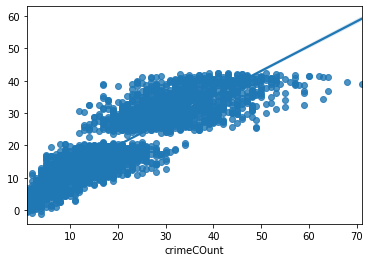

In [91]:
sns.regplot(x=y_test,y=predictions)

In [92]:
"""
    1)R2 Score gives the extent the proportion of variance in the 
        depedent variable is explained by the variance in the independe variables
    2)MAE The absolute error is the difference between the predicted values 
        and the actual values.
    3)MSE The mean squared error or MSE is similar to the MAE, except you
        take the average of the squared differences between the predicted values and the actual values.
"""



In [114]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [93]:
print("R2 Score: ",metrics.r2_score(y_test, predictions))
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R2 Score:  0.786827196951434
MAE: 4.407697592774212
MSE: 34.70148959936734
RMSE: 5.8907970258164
